In [1]:
from matplotlib import pyplot as plt
import torch
from qgnn_eval_utils import graph_scoring_efficiency
from torch.utils.data import Dataset
import os
import yaml

/home/mcamp/micromamba/envs/acorn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
### ScoredGraphs accepts name of folder with scored graphs inside

class ScoredGraphs(Dataset):

    def __init__(self, data):
        self.data = data
    def __len__(self):
        return 1

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        file_name= os.path.join(self.data, os.listdir(self.data)[idx])
        graph = torch.load(file_name)

        return graph

In [3]:
with open('gnn_eval.yaml', "r") as stream:
    config = (yaml.load(stream, Loader=yaml.FullLoader))
config

{'stage': 'edge_classifier',
 'model': 'InteractionGNN',
 'input_dir': 'MY_DATA_DIR/Example_1/module_map/',
 'stage_dir': '8qubitplot',
 'project': 'CF_Example_1_GNN',
 'accelerator': 'gpu',
 'devices': 1,
 'nodes': 1,
 'data_split': [0, 10, 0],
 'score_cut': 0.5,
 'target_tracks': {'pt': [1000.0, inf], 'nhits': [3.0, inf], 'primary': True},
 'plots': {'graph_scoring_efficiency': {'title': 'Interaction GNN Edge-wise Efficiency',
   'pt_units': 'MeV'},
  'graph_roc_curve': {'title': 'Interaction GNN ROC curve'}}}

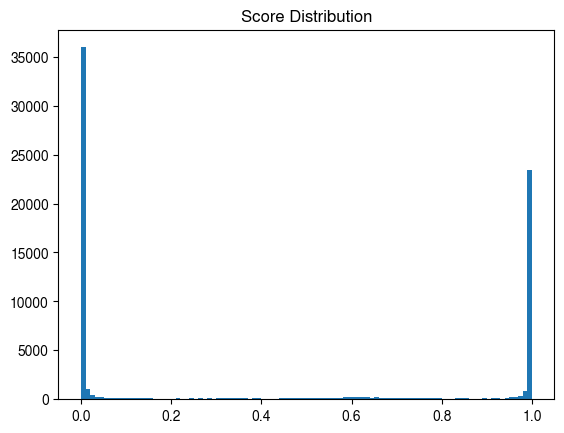

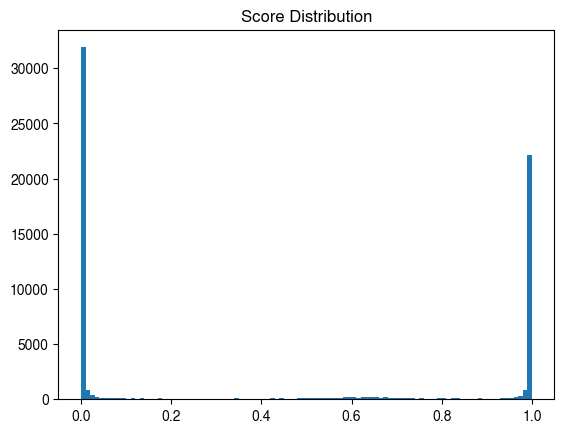

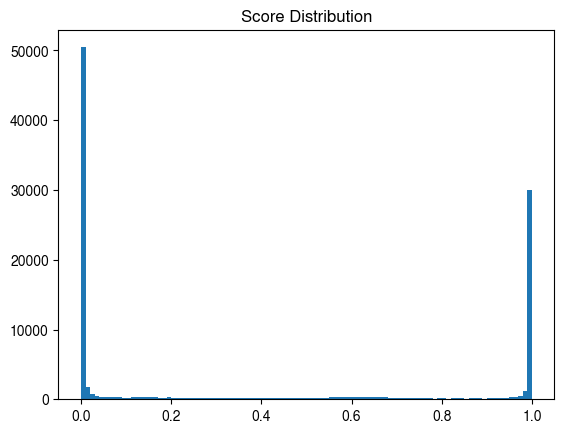

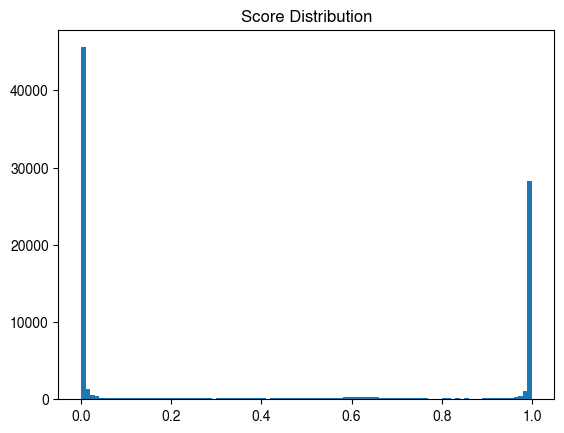

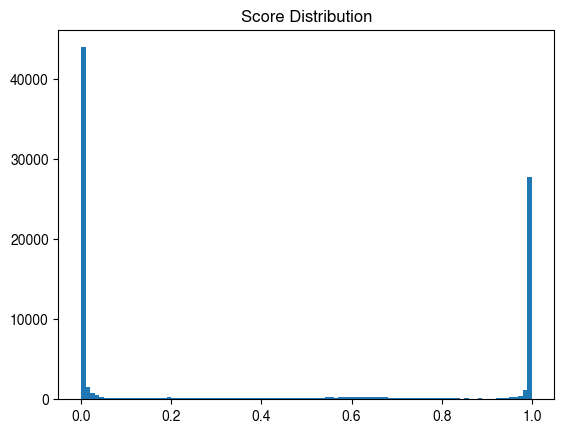

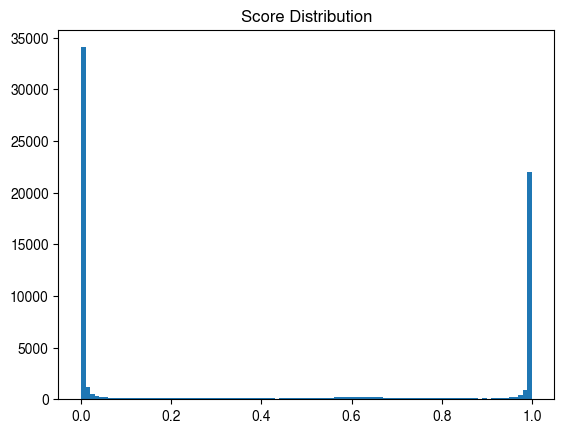

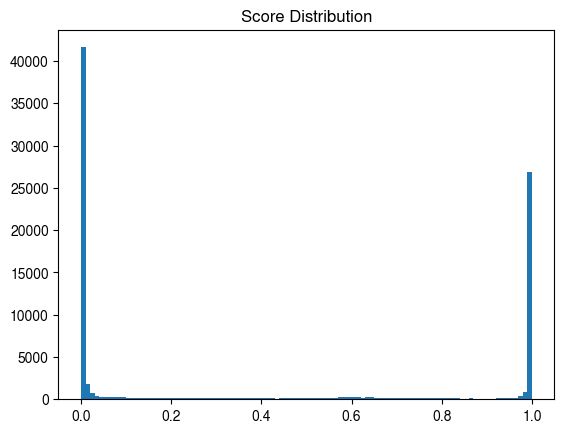

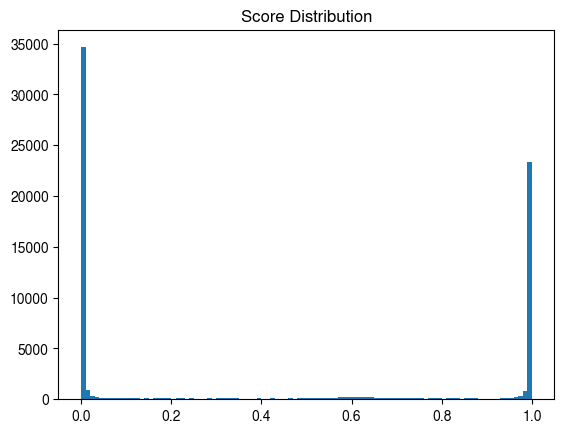

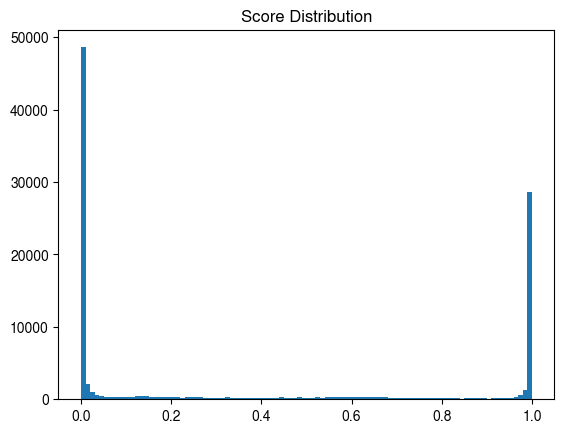

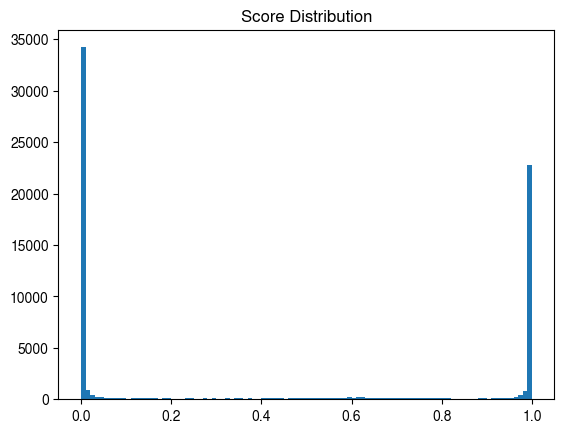

In [10]:
### plot the score distributions in histogram
### edit ScoredGraphs to include correct folder name

for i in range(10):
    x=ScoredGraphs('qgnn_test_scores')[i]['scores']

    plt.figure()
    plt.hist(x,bins=100)
    plt.title(f'Score Distribution')
    plt.show()

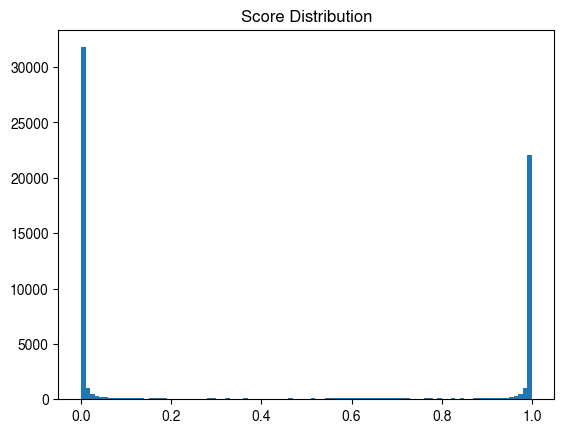

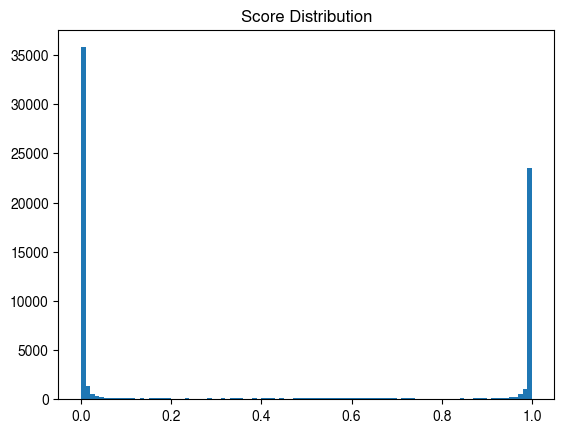

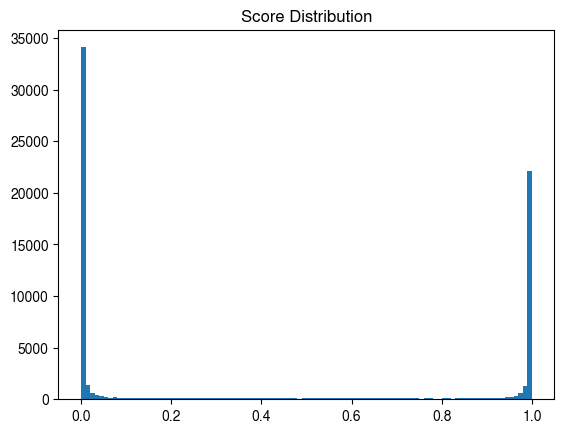

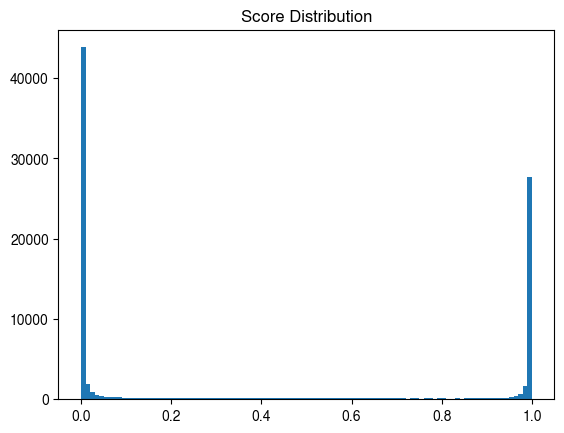

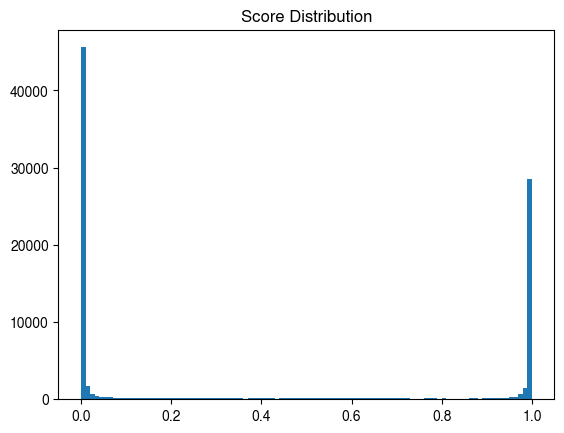

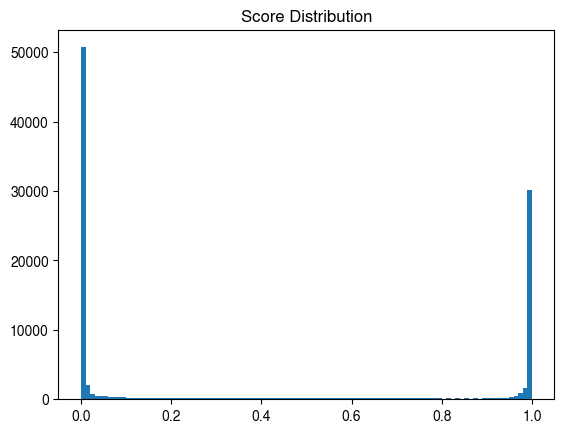

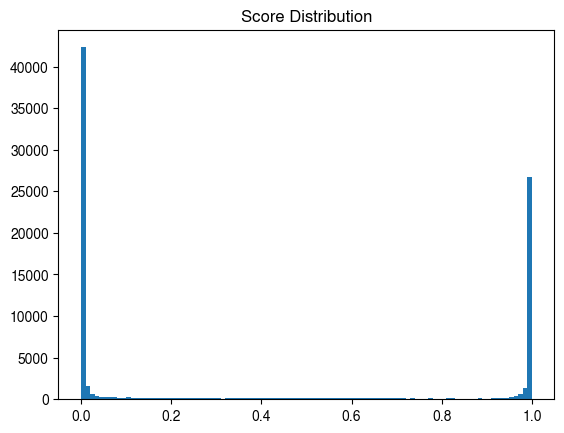

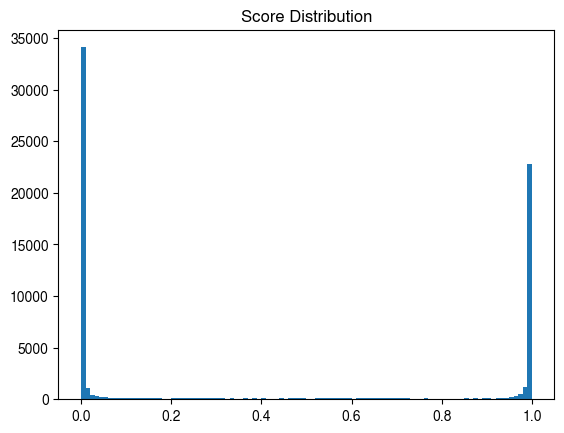

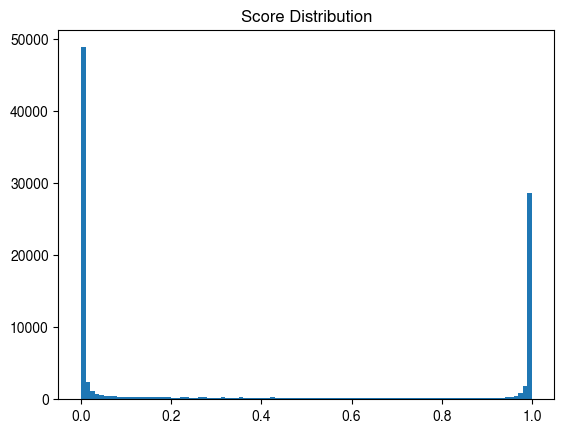

IsADirectoryError: [Errno 21] Is a directory: 'classic_test_scores/.ipynb_checkpoints'

In [16]:
### plot the score distributions in histogram
### edit ScoredGraphs to include correct folder name

for i in range(10):
    x=ScoredGraphs('classic_test_scores')[i]['scores']

    plt.figure()
    plt.hist(x,bins=100)
    plt.title(f'Score Distribution')
    plt.show()

In [13]:
### I only change ylim in plot config and stage_dir in config
### note: change stage_dir to save to different folder

plot_config = {'title': 'Interaction GNN Edge-wise Efficiency', 'pt_units': 'MeV', 'ylim': [0.65, 1.04]}

with open('gnn_eval.yaml', "r") as stream:
    config = (yaml.load(stream, Loader=yaml.FullLoader))
config

{'stage': 'edge_classifier',
 'model': 'InteractionGNN',
 'input_dir': 'MY_DATA_DIR/Example_1/module_map/',
 'stage_dir': '8qubitplot',
 'project': 'CF_Example_1_GNN',
 'accelerator': 'gpu',
 'devices': 1,
 'nodes': 1,
 'data_split': [0, 10, 0],
 'score_cut': 0.5,
 'target_tracks': {'pt': [1000.0, inf], 'nhits': [3.0, inf], 'primary': True},
 'plots': {'graph_scoring_efficiency': {'title': 'Interaction GNN Edge-wise Efficiency',
   'pt_units': 'MeV'},
  'graph_roc_curve': {'title': 'Interaction GNN ROC curve'}}}

In [16]:
qgraphs = ScoredGraphs('8qubit_1000_scores')

Plotting efficiency against pT and eta
Finish plotting. Find the plot at 8qubitplot/edgewise_efficiency_pt.png
Finish plotting. Find the plot at 8qubitplot/edgewise_efficiency_eta.png


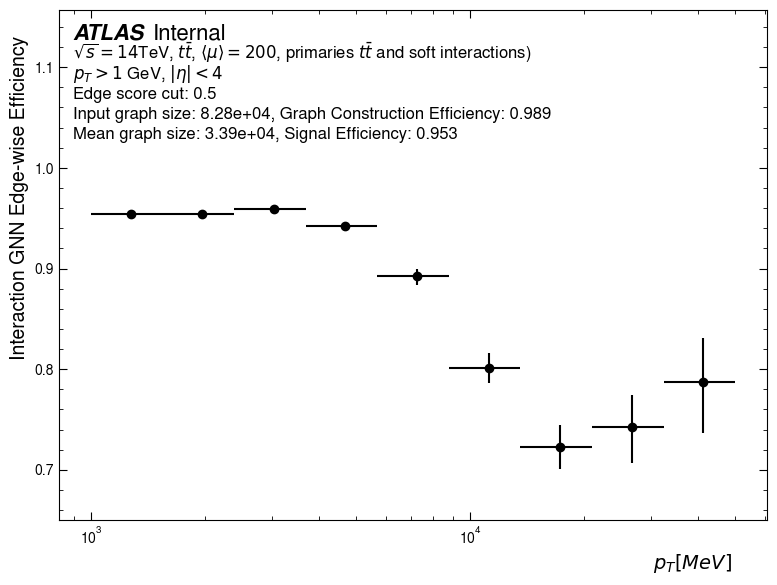

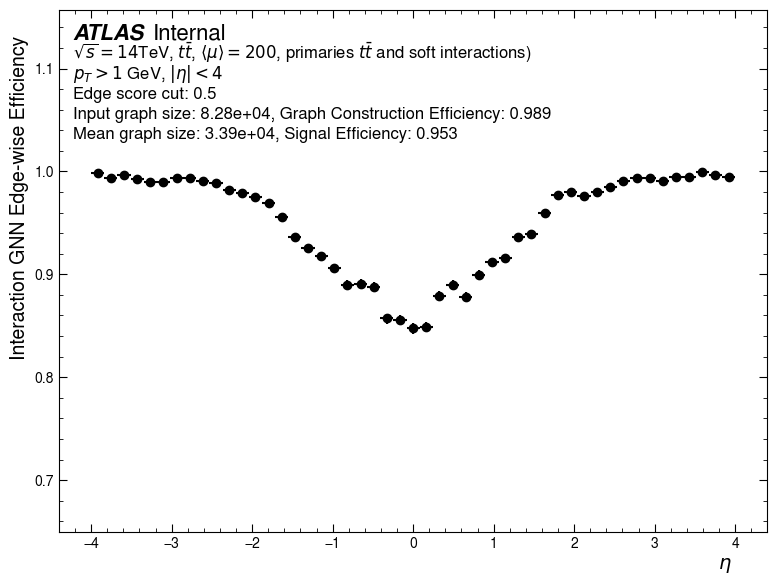

In [17]:
graph_scoring_efficiency(qgraphs, plot_config, config)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
qdf = pd.read_csv('loss_log_qgnn_firsttest.csv')
cdf = pd.read_csv('loss_log_classic_5_25.csv')
gdf = pd.read_csv('loss_log_classic_gpu.csv')
g5df = pd.read_csv('loss_log_classic_gpu_50_epoch.csv')
sixq = pd.read_csv('loss_log_qgnn_6qubit.csv')
eightq = pd.read_csv('loss_log_qgnn_8qubit.csv')

In [9]:
qdf['train loss'] *= 4
cdf['train loss'] *= 4
gdf['train loss'] *= 4

In [4]:
sixq

,Unnamed: 0,train loss,validation loss,test_loss
0,0,0.940374,0.877835,0.130191
1,1,0.886891,0.872197,0.130191
2,2,0.867498,0.863855,0.130191
3,3,0.852688,0.850216,0.130191
4,4,0.850259,0.846366,0.130191
5,5,0.838080,0.838227,0.130191
6,6,0.837808,0.843491,0.130191
7,7,0.832313,0.820296,0.130191
8,8,0.789496,0.787187,0.130191
9,9,0.750220,0.719731,0.130191


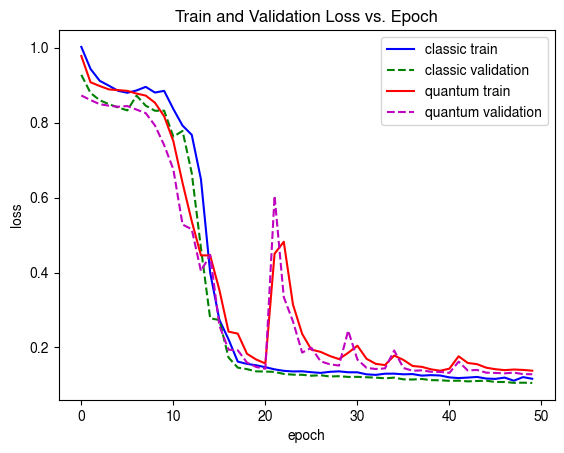

In [71]:
plt.plot(cdf['train loss'], '-b', label = 'classic train')
plt.plot(cdf['validation loss'],'--g', label = 'classic validation')

plt.plot(qdf['train loss'], '-r', label = 'quantum train')
plt.plot(qdf['validation loss'], '--m', label = 'quantum validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title('Train and Validation Loss vs. Epoch')
plt.savefig('losscurves.png')
plt.show()

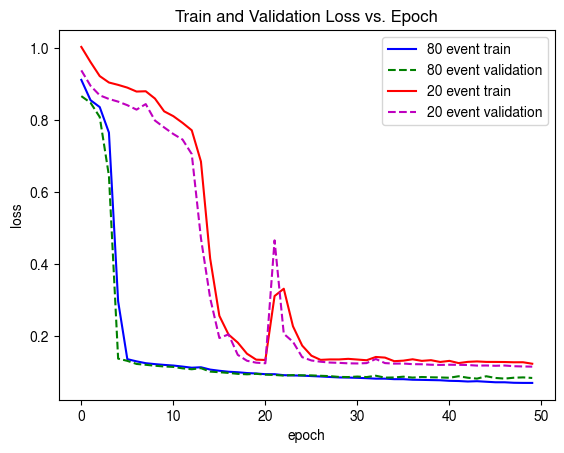

In [21]:
plt.plot(g5df['train loss'], '-b', label = '80 event train')
plt.plot(g5df['validation loss'],'--g', label = '80 event validation')
plt.plot(gdf['train loss'], '-r', label = '20 event train')
plt.plot(gdf['validation loss'],'--m', label = '20 event validation')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title('Train and Validation Loss vs. Epoch')
plt.savefig('gpulosscurves.png')
plt.show()

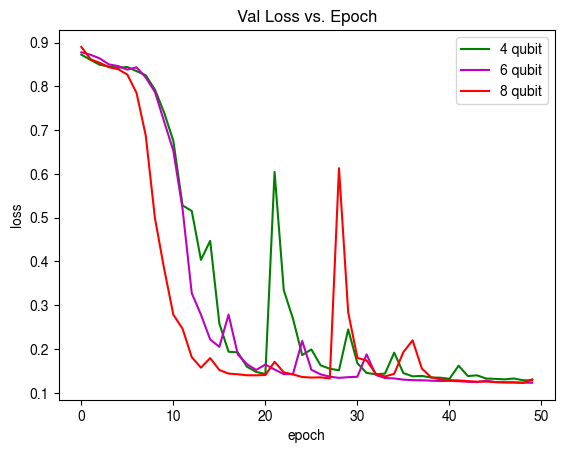

In [12]:
#plt.plot(qdf['train loss'], '-b', label = '4 qubit')
plt.plot(qdf['validation loss'],'-g', label = '4 qubit')
#plt.plot(sixq['train loss'], '-r', label = '6 qubit')
plt.plot(sixq['validation loss'],'-m', label = '6 qubit')
#plt.plot(eightq['train loss'], '-g', label = '8 qubit')
plt.plot(eightq['validation loss'],'-r', label = '8 qubit')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title('Val Loss vs. Epoch')
#plt.savefig('gpulosscurves.png')
plt.show()